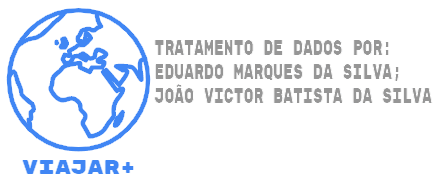

In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrame das acomodações

In [323]:
df=pd.read_csv('acomodacoes.csv')

# Listando os dados NaN e as colunas

In [324]:
df.isnull().mean()*100

id                                 0.000000
link_da_acomodacão                 0.000000
nome                               0.180928
resumo                             6.092244
o_espaço                          38.436898
descrição                          2.758416
visao_geral_bairro                44.125760
observações                       66.640961
transito                          44.419398
acesso                            52.448465
interacao                         50.164615
regras_da_casa                    48.319739
link_da_foto                       0.000000
host_id                            0.000000
host_url                           0.000000
nome_host                          0.059321
inicio_host                        0.059321
superhost                          0.059321
numero_de_acomodacoes_host         0.059321
verificações_do_host               0.000000
host_tem_foto_perfil               0.059321
host_tem_identidade_verificada     0.059321
bairro                          

# Filtramos por acomodações no bairro 'Centro', para ficar próximo das principais atrações da cidade, inclusive o Museu de Belas Artes

In [325]:
acomo_centro=df.loc[df['bairro']=='Centro']

# Eliminar acomodações que não suportam pelo menos 3 pessoas

In [326]:
acomo_centro=acomo_centro.loc[acomo_centro['pessoas_inclusas_no_preço'] >=3]

# Como tem uma criança de 5 anos, tiramos as acomodações divididas por questões de segurança

In [327]:
acomo_centro=acomo_centro.loc[acomo_centro['tipo_de_quarto'] =='Entire home/apt']

# Visualizando os preços, removendo o cifrão e transformando os dados em float

In [328]:
acomo_centro['preço']=acomo_centro['preço'].str.replace(r'$', '')


In [329]:
acomo_centro['preço']=acomo_centro['preço'].str.replace(r',', '').astype(float)

# Filtrando acomodações dentro do orçamento da família

In [330]:
acomo_centro['preço'].sort_values(ascending=False)
acomo_centro=acomo_centro.loc[acomo_centro['preço'] <=252]

# Filtrando as acomodações por 'superhost'

In [331]:
acomo_centro=acomo_centro.loc[acomo_centro['superhost']== 't']

# Pela preferencia do perfil 1 , é necessário uma acomodação com Wi-Fi. Portanto, iremos filtrar as descrições

In [332]:
acomo_centro['descrição'].iloc[0]

'Quarto e sala, 3 camas, TV, ventilador de teto, geladeira, micro ondas, sanduicheira, liquidificador, wi-fi, perto da Av. Presidente Vargas, Sambódromo, Candelária, Central do Brasil, Cruz Vermelha, Supermercado.  Local de comércio de utensilios de cozinha, calmo final de semana, apartamento de fundos, tranquilo, banheiro e cozinha reformados, portaria em obra no momento. Ótimo para família. Estarei sempre disponível,  Check in  24 horas. Local tranquilo com 3 camas. Todos os utensílios de cozinha, tábua de passar roupas, ferro elétrico. Wi-fi, tv Apartamento inteiro à disposição Estarei disponível para todas as informações. Acesso para a Praça Mauá (Museu do amanhã), barcas, metrô, central do Brasil (ferrovia). Av. Presidente Vargas e Rio Branco, Rodoviária. Campo de Santana para caminhada, com muito verde. Ao lado do sambódromo (onde tem os desfiles de carnaval) Rua de comércio de utensílios de cozinha para hotéis, fogão industrial, panelas grandes. Final de semana tem menos movimen

In [333]:
acomo_centro['descrição'].iloc[1]

'We stayed in the same block from Rio Scenarium  and near the Metropolitan Cathedral, theaters (including the Municipal) and all the bars and restaurants of Lapa venues . On the first Saturday of each month is held the antiques fair of Lavradio Street ( Must ) . Furnished, equipped kitchen , laundry, WiFi , TV with 150 channels , bedding and bath , bright and airy environment. Space for couples, families ( with children) , business trip and groups up to 6 people . The apartment has been designed to make guests feel more at home. It comfortably accommodates 8 people. It has two bedrooms with cabinets with hangers in both, one of them with queen-size double bed and a single box bunk bed, another with bunk bed and a double sofa bed in the living room. It has air conditioning in both bedrooms (no air conditioner in the room) and fans in all environments. The living room has a very comfortable sofa, with a smartv and HDMI input for those passionate about movies and / or netflix, wi-fi inter

In [334]:
acomo_centro['descrição'].iloc[2]

'Apartamento espaçoso e seguro com quarto e sala grande com cozinha americana completa, WI FI, TV e ar condicionado. O quarto possui uma cama de casal e uma bicama, ar condicionado e armário. A Sala possui TV com antena do prédio, ventilador, sofá cama para 2 pessoas. A cozinha possui geladeira, microondas, fogão e utensílios de cozinha. O banheiro tem chuveiro quente e máquina de lavar. O apê tem roupa de cama e toalhas, sabonete e demais itens básicos. Perto de todas as atrações da Lapa O apê é silencioso, andar alto, localizado na Lapa, perto de comércio e atrações turísticas. Ao apartamento todo. Estou disponível para dúvidas. Basta mandar uma mensagem ou me adicionar como Breno Espozel nas redes sociais. O bairro da Lapa é repleto de atraçôes diurnas e noturnas. Não há estacionamento no prédio mas há estacionamento nas redondezas. Todavia é fácil pegar vários transportes públicos e privados. Há estacionamento privado nas redondezas por 20 reais 12h.'

In [335]:
acomo_centro['descrição'].iloc[3]

'O apartamwnto possui cama de casal e mais dois colchões. Tv, WIFI e dois ventiladores. O apartamento está situado em rua segura entre o prédio da Petrobras e a maior delegacia do Centro.  Ele está a 400 metros da estação de metrô da Carioca e perto das atrações da Lapa, tais como os Arcos da Lapa, Escadaria Selaron, Fundição Progresso e Circo Voador. Além da cama de casal coloco dois colchões de solteiro para poder oferecer o espaço para até 4 pessoas. Através do (Hidden by Airbnb) . Andando vc está na Lapa e no Centro. Em 20 minutos de transporte nas praias e no Maracanã. Há estacionamento privado nas redondezas por 20 reais 12h.'

In [336]:
acomo_centro['descrição'].iloc[4]

'Lapa;/Centro. Ao lado do metrô! Estúdio todo reformado, com cama de casal, sofá cama, ar split, TV, internet. Ao lado do metrô da Cinelândia e do VLT. A poucos minutos a pé do Aeroporto Santos Dumont. Ao lado do Teatro Rival. Ideal para quem quer a praticidade de ter o metrô à disposição, perto da Lapa, do aeroporto. Praticidade e comodidade. Metrô, Aeroporto, VLT, Lapa.'

# As 5 acomodações se mantêm

# Como as 5 acomodações estão localizadas no mesmo bairro, gastos com transporte serão os mesmos.Assim, vamos para os passeios turísticos.

# 1° Ponto turístico obrigatório: Museu de Belas Artes
    Distância até a acomodação: 0,95 Km
    Preço ingresso família(até 4 pessoas): R$8,00

In [337]:
preco_museu= 8 + (0.95 * 2 * 3)
print(f'Valor gasto com a visita ao Museu Belas Artes: R${preco_museu}0')

Valor gasto com a visita ao Museu Belas Artes: R$13.70


# 2° e 3° ponto turístico: Praia de Joatinga e Mirante do Joá
    Distância a partir da acomodação: Ida= 20,5 Km; Volta com parada Mirante do Joá= 21,7 Km
    Entrada franca nos dois locais

In [338]:
preco_praia_joatinga= (20.5 + 21.7) * 3
print('Valor gasto com visita a Praia de Joatinga com parada no Mirante do Joá: R$%.2f' %(preco_praia_joatinga))

Valor gasto com visita a Praia de Joatinga com parada no Mirante do Joá: R$126.60


# 4° Ponto turístico: AquaRio
    Distância até a acomodação: 4,1 Km
    Entrada: Vip Expresso= 160,00 reais ; Meia entrada= 70,00 reais

In [339]:
preco_aquario= (4.1 * 2 * 3) + (160 * 2) + 70
print('Valor gasto com a visita ao AquaRio: R$%.2f' %(preco_aquario))

Valor gasto com a visita ao AquaRio: R$414.60


# 5° Ponto turístico: Passeio de bondinho no Pão de Açucar
    Distância até a acomodação: 9,1 Km
    Entrada: Criança menor que 6 anos não paga; Ingresso adulto= 114,00 reais

In [340]:
preco_pao_de_acucar= (9.1 * 2 * 3) + (114 * 2)
print('Valor gasto com a visita ao Pão de Açucar: R$%.2f' %(preco_pao_de_acucar))

Valor gasto com a visita ao Pão de Açucar: R$282.60


# 6° Ponto turístico: Cazota Bar

In [341]:
#Distância até a acomodação: 0,8 Km
#Entrada franca, consumação a parte ; Valor médio gasto até 3 pessoas: 100 reais

valor_cazota= (0.8 * 2 * 3) + 100
print('Valor gasto com a visita ao Cazota Bar: R$%.2f' %(valor_cazota))

Valor gasto com a visita ao Cazota Bar: R$104.80


# Gasto com os passeios turísticos

In [342]:
gastos_passeios=preco_museu + preco_praia_joatinga + preco_aquario + preco_pao_de_acucar+valor_cazota
print("Gasto total dos passeios turisticos= R$%.2f" %(gastos_passeios))

Gasto total dos passeios turisticos= R$942.30


# Removendo o cifrão da coluna Taxa de limpeza

In [343]:
acomo_centro['taxa_de_limpeza']=acomo_centro['taxa_de_limpeza'].str.replace(r'$', '')

In [344]:
acomo_centro['taxa_de_limpeza']=acomo_centro['taxa_de_limpeza'].astype(float)

# Calculando gastos com cada estadia ( taxa de limpeza + 4*preço)

In [345]:
quantidade_acomo=acomo_centro.count()
gastos_acomos=[]
for i in range(5):
    id_acomo=acomo_centro['id'].iloc[i]
    gastos_acomos.append((acomo_centro['taxa_de_limpeza'].iloc[i]) + (acomo_centro['preço'].iloc[i]) * 4)

# Como temos um orçamento de 1500 reais, vamos analisar qual acomodação se encaixa nesta condição

In [346]:
for i in range(5):
    acomo_id=acomo_centro['id'].iloc[i]
    gasto_total=gastos_passeios+gastos_acomos[i]
    if gasto_total<1500:
        print(f"A acomodaçao cujo id:{acomo_id} esta dentro do orçamento = R${gasto_total}")
    

A acomodaçao cujo id:13781445 esta dentro do orçamento = R$1496.3000000000002
A acomodaçao cujo id:32165301 esta dentro do orçamento = R$1498.3000000000002
A acomodaçao cujo id:32500735 esta dentro do orçamento = R$1414.3000000000002


In [347]:
acomo_centro.loc[acomo_centro['id']==13781445]

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,...,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
14371,13781445,https://www.airbnb.com/rooms/13781445,"Ap. inteiro. Quarto e sala. Centro, sambódromo.","Quarto e sala, 3 camas, TV, ventilador de teto...",Local tranquilo com 3 camas. Todos os utensíli...,"Quarto e sala, 3 camas, TV, ventilador de teto...","Acesso para a Praça Mauá (Museu do amanhã), ba...",Deixo o hóspede a vontade e me disponho a orie...,Local bom para acesso ao comércio. Estacioname...,Apartamento inteiro à disposição,...,1125,19,2016-08-19,2019-03-26,98.0,10.0,10.0,10.0,9.0,0.48


In [348]:
acomo_centro.loc[acomo_centro['id']==32165301]

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,...,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
27544,32165301,https://www.airbnb.com/rooms/32165301,"Apê seguro, espaçoso e bem localizado na Lapa!!!",Apartamento espaçoso e seguro com quarto e sal...,"O apê é silencioso, andar alto, localizado na ...",Apartamento espaçoso e seguro com quarto e sal...,O bairro da Lapa é repleto de atraçôes diurnas...,Há estacionamento privado nas redondezas por 2...,Não há estacionamento no prédio mas há estacio...,Ao apartamento todo.,...,1125,70,2019-02-19,2019-11-19,97.0,9.0,10.0,10.0,10.0,7.58


In [349]:
acomo_centro.loc[acomo_centro['id']==32500735]

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,...,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
27988,32500735,https://www.airbnb.com/rooms/32500735,Apê aconchegante na Lapa! Ótima opção econômica!,O apartamwnto possui cama de casal e mais dois...,Além da cama de casal coloco dois colchões de ...,O apartamwnto possui cama de casal e mais dois...,Andando vc está na Lapa e no Centro. Em 20 min...,Há estacionamento privado nas redondezas por 2...,NaN,NaN,...,1125,57,2019-03-08,2019-11-02,97.0,10.0,10.0,10.0,10.0,6.58


# Agora que temos 3 acomodações que suportam o orçamento, vamos para a análise final: o espaço de cada acomodação

In [350]:
acomo_centro['o_espaço'].loc[14371]

'Local tranquilo com 3 camas. Todos os utensílios de cozinha, tábua de passar roupas, ferro elétrico. Wi-fi, tv'

In [351]:
acomo_centro['o_espaço'].loc[27544]

'O apê é silencioso, andar alto, localizado na Lapa, perto de comércio e atrações turísticas.'

In [352]:
acomo_centro['o_espaço'].loc[27988]

'Além da cama de casal coloco dois colchões de solteiro para poder oferecer o espaço para até 4 pessoas.'

# Seguindo as necessidades do PERFIL 1(lugar silencioso) , temos como acomodação escolhida a de  id = 32165301

In [353]:
acomo_centro=acomo_centro.loc[acomo_centro['id']==32165301 ]

# Informações sobre o host

In [354]:
acomo_centro.host_url

27544    https://www.airbnb.com/users/show/79151243
Name: host_url, dtype: object